In [1]:
import numpy as np
import pandas as pd 
import re
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import time 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactively='all'

In [2]:
sp=pd.read_csv('MobileData_Clean.csv')
sp

,Unnamed: 0,Unnamed: 0.1,Product Name,OfferPrice,OrignalPrice,Discount,Ratings,Brand,Color,RamSize,Storage,Expandable Storage,Screen Size,Display,RearCamera,FrontCamera,battery,Processor
0,0,0,REDMI 9i,7999,9999,20,4.3,REDMI,Midnight Black,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
1,1,1,REDMI 9i,7999,9999,20,4.3,REDMI,Sea Blue,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
2,2,2,POCO M3,10999,12999,15,4.3,POCO,Cool Blue,6,64,512,16.59,0,48,8,6000,Qualcomm Snapdragon 662 Processor
3,3,3,REDMI 9i,7999,9999,20,4.3,REDMI,Nature Green,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
4,4,4,realme C20,6799,7999,15,4.5,realme,Cool Blue,2,32,256,16.51,1,8,5,5000,MediaTek Helio G35 Processor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,643,643,realme Narzo 30A,9999,10999,9,4.4,realme,Laser Blue,4,64,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
644,644,644,realme Narzo 30A,9999,10999,9,4.4,realme,Laser Black,4,64,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
645,645,645,realme Narzo 30A,8999,9999,10,4.4,realme,Laser Black,3,32,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
646,646,646,realme 7,15499,20999,26,4.3,realme,Mist Blue,8,128,256,16.51,0,64,16,5000,MediaTek Helio G95 Processor


In [3]:
sp.rename(columns={'Unnamed: 0':'S.NO'},inplace=True)

In [4]:
sp

,S.NO,Unnamed: 0.1,Product Name,OfferPrice,OrignalPrice,Discount,Ratings,Brand,Color,RamSize,Storage,Expandable Storage,Screen Size,Display,RearCamera,FrontCamera,battery,Processor
0,0,0,REDMI 9i,7999,9999,20,4.3,REDMI,Midnight Black,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
1,1,1,REDMI 9i,7999,9999,20,4.3,REDMI,Sea Blue,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
2,2,2,POCO M3,10999,12999,15,4.3,POCO,Cool Blue,6,64,512,16.59,0,48,8,6000,Qualcomm Snapdragon 662 Processor
3,3,3,REDMI 9i,7999,9999,20,4.3,REDMI,Nature Green,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
4,4,4,realme C20,6799,7999,15,4.5,realme,Cool Blue,2,32,256,16.51,1,8,5,5000,MediaTek Helio G35 Processor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,643,643,realme Narzo 30A,9999,10999,9,4.4,realme,Laser Blue,4,64,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
644,644,644,realme Narzo 30A,9999,10999,9,4.4,realme,Laser Black,4,64,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
645,645,645,realme Narzo 30A,8999,9999,10,4.4,realme,Laser Black,3,32,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
646,646,646,realme 7,15499,20999,26,4.3,realme,Mist Blue,8,128,256,16.51,0,64,16,5000,MediaTek Helio G95 Processor


# Exploring the dataset

In [5]:
sp.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [6]:
sp['Brand'].unique()

array(['REDMI', 'POCO', 'realme', 'OPPO'], dtype=object)

In [7]:
sp.describe()

,S.NO,OfferPrice,OrignalPrice,Discount,Ratings,RamSize,Storage,Expandable Storage,Screen Size,Display,RearCamera,FrontCamera,battery
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,323.500000,9501.291667,11872.125000,19.375000,4.354167,4.125000,57.333333,352.000000,16.402083,0.708333,24.125000,7.041667,5256.250000
std,187.205769,2082.204920,2805.943655,5.855535,0.070642,1.453491,26.114005,124.031207,0.310401,0.454881,18.730121,3.050293,689.388757
min,0.000000,6799.000000,7999.000000,9.000000,4.300000,2.000000,32.000000,256.000000,15.800000,0.000000,8.000000,5.000000,4230.000000
25%,161.750000,7996.750000,9999.000000,15.000000,4.300000,3.000000,32.000000,256.000000,16.510000,0.000000,13.000000,5.000000,5000.000000
50%,323.500000,9249.000000,10999.000000,20.000000,4.300000,4.000000,64.000000,256.000000,16.550000,1.000000,13.000000,5.000000,5000.000000
75%,485.250000,10624.000000,12999.000000,25.250000,4.400000,4.500000,64.000000,512.000000,16.590000,1.000000,48.000000,8.000000,6000.000000
max,647.000000,15499.000000,20999.000000,27.000000,4.500000,8.000000,128.000000,512.000000,16.590000,1.000000,64.000000,16.000000,6000.000000


In [8]:
sp.groupby(["Brand"]).describe().T


Brand                 OPPO         POCO        REDMI       realme
S.NO    count   135.000000   162.000000    81.000000   270.000000
        mean    327.800000   320.000000   313.333333   326.500000
        std     187.637305   187.544082   188.102033   187.412745
        min      13.000000     2.000000     0.000000     4.000000
        25%     161.500000   155.250000   147.000000   165.250000
...                    ...          ...          ...          ...
battery min    4230.000000  5000.000000  5000.000000  5000.000000
        25%    4230.000000  5000.000000  5000.000000  5000.000000
        50%    4230.000000  6000.000000  5000.000000  6000.000000
        75%    4230.000000  6000.000000  5000.000000  6000.000000
        max    4230.000000  6000.000000  5000.000000  6000.000000

[104 rows x 4 columns]

### BRAND VS OrignalPrice

In [9]:
sp.groupby(["Brand"]).describe()["OrignalPrice"].T

Brand,OPPO,POCO,REDMI,realme
count,135.000000,162.000000,81.0,270.000000
mean,11390.000000,12665.666667,9999.0,12199.000000
std,491.722528,1495.334359,0.0,3977.258775
min,10990.000000,9999.000000,9999.0,7999.000000
25%,10990.000000,11999.000000,9999.0,9999.000000
50%,10990.000000,12999.000000,9999.0,10999.000000
75%,11990.000000,12999.000000,9999.0,12999.000000
max,11990.000000,14999.000000,9999.0,20999.000000



## Observations
* we observed that the highest price offerning realme.
* we observe that mean and median for 1 Brands like REDMI is same.
* we observe that mean of OPPO brand is near to median by 400.
* we observe that median of POCO brand is greater than mean.

### BRAND VS OfferPrice

In [10]:
sp.groupby(["Brand"]).describe()["OfferPrice"].T

Brand,OPPO,POCO,REDMI,realme
count,135.000000,162.000000,81.0,270.000000
mean,8790.000000,10332.333333,7999.0,9809.000000
std,983.445056,1467.028941,0.0,2685.817771
min,7990.000000,7499.000000,7999.0,6799.000000
25%,7990.000000,9499.000000,7999.0,7999.000000
50%,7990.000000,10999.000000,7999.0,9499.000000
75%,9990.000000,10999.000000,7999.0,10499.000000
max,9990.000000,11999.000000,7999.0,15499.000000


## Observations
* we observed that the minimum offer price offered by realme brand is 6799.0.
* It gives very cheap OfferPrice from all other brands.

## BRAND VS OfferPrice

In [11]:
sp.groupby(["Brand"]).describe()["Storage"].T

Brand,OPPO,POCO,REDMI,realme
count,135.000000,162.000000,81.0,270.000000
mean,44.800000,69.333333,64.0,54.400000
std,15.735121,28.809936,0.0,28.853482
min,32.000000,32.000000,64.0,32.000000
25%,32.000000,64.000000,64.0,32.000000
50%,32.000000,64.000000,64.0,48.000000
75%,64.000000,64.000000,64.0,64.000000
max,64.000000,128.000000,64.0,128.000000


## Observations:
* we observe that:
* OPPO is offering min of 32 GB and Max of 64 GB
* POCO is offering min of 32 GB and Max of 128 GB
* REDMI is offering min of 64 GB and Max of 64 GB
* realme is offering min of 32 GB and Max of 128 GB
* It's observed that POCO,Realme is offering 128 GB memory for its mobile.

### BRAND VS Ratings

In [12]:
sp.groupby(["Brand"]).describe()["Ratings"].T

Brand,OPPO,POCO,REDMI,realme
count,135.000000,162.000000,8.100000e+01,270.00000
mean,4.340000,4.333333,4.300000e+00,4.39000
std,0.049172,0.074767,6.255986e-15,0.07013
min,4.300000,4.300000,4.300000e+00,4.30000
25%,4.300000,4.300000,4.300000e+00,4.30000
50%,4.300000,4.300000,4.300000e+00,4.40000
75%,4.400000,4.300000,4.300000e+00,4.40000
max,4.400000,4.500000,4.300000e+00,4.50000


## Observations
* The mean and median are nearer for Brand OPPO.
* The mean and median are same for Brand REDMI.
* The Brands POCO,Realme is shown with max of 4.5 ratings.

### BRAND VS PRODUCT_NAME VS BATTERY

In [13]:
sp.groupby(["Brand","Product Name"]).describe()["battery"].T

Brand             OPPO     POCO                                REDMI  \
Product Name OPPO A12  POCO C3  POCO M2 Reloaded  POCO M3  REDMI 9i    
count            135.0     27.0              27.0    108.0      81.0   
mean            4230.0   5000.0            5000.0   6000.0    5000.0   
std                0.0      0.0               0.0      0.0       0.0   
min             4230.0   5000.0            5000.0   6000.0    5000.0   
25%             4230.0   5000.0            5000.0   6000.0    5000.0   
50%             4230.0   5000.0            5000.0   6000.0    5000.0   
75%             4230.0   5000.0            5000.0   6000.0    5000.0   
max             4230.0   5000.0            5000.0   6000.0    5000.0   

Brand           realme                                           \
Product Name realme 7  realme C12  realme C20  realme Narzo 20    
count             54.0        54.0        54.0             27.0   
mean            5000.0      6000.0      5000.0           6000.0   
std                0.0         0.0         0.0              0.0   
min             5000.0      6000.0      5000.0           6000.0   
25%             5000.0      6000.0      5000.0           6000.0   
50%             5000.0      6000.0      5000.0           6000.0   
75%             5000.0      6000.0      5000.0           6000.0   
max             5000.0      6000.0      5000.0           6000.0   

Brand                           
Product Name realme Narzo 30A   
count                     81.0  
mean                    6000.0  
std                        0.0  
min                     6000.0  
25%                     6000.0  
50%                     6000.0  
75%                     6000.0  
max                     6000.0

## Observations:
* poco is offering 6000 caapacity batteries for their mobiles.
* It is observed that Realmi is offering upto 5000 to 6000 mah Battery capacity.
* It is observed that Redmi is offering upto 5000 mah Battery capacity.
* here oppo has minimum battery capacity is 4230 and also max is 4230 mah.

### BRAND VS PRODUCTNAME VS SCREEN_SIZE

In [14]:
sp.groupby(["Brand","Product Name"]).describe()["Screen Size"].T

Brand                 OPPO          POCO                                  \
Product Name     OPPO A12       POCO C3  POCO M2 Reloaded       POCO M3    
count         1.350000e+02  2.700000e+01      2.700000e+01  1.080000e+02   
mean          1.580000e+01  1.659000e+01      1.659000e+01  1.659000e+01   
std           2.496162e-14  1.086117e-14      1.086117e-14  2.855421e-14   
min           1.580000e+01  1.659000e+01      1.659000e+01  1.659000e+01   
25%           1.580000e+01  1.659000e+01      1.659000e+01  1.659000e+01   
50%           1.580000e+01  1.659000e+01      1.659000e+01  1.659000e+01   
75%           1.580000e+01  1.659000e+01      1.659000e+01  1.659000e+01   
max           1.580000e+01  1.659000e+01      1.659000e+01  1.659000e+01   

Brand                REDMI        realme                              \
Product Name     REDMI 9i      realme 7    realme C12    realme C20    
count         8.100000e+01  5.400000e+01  5.400000e+01  5.400000e+01   
mean          1.659000e+01  1.651000e+01  1.656000e+01  1.651000e+01   
std           1.072455e-14  7.172146e-15  2.151644e-14  7.172146e-15   
min           1.659000e+01  1.651000e+01  1.656000e+01  1.651000e+01   
25%           1.659000e+01  1.651000e+01  1.656000e+01  1.651000e+01   
50%           1.659000e+01  1.651000e+01  1.656000e+01  1.651000e+01   
75%           1.659000e+01  1.651000e+01  1.656000e+01  1.651000e+01   
max           1.659000e+01  1.651000e+01  1.656000e+01  1.651000e+01   

Brand                                            
Product Name realme Narzo 20  realme Narzo 30A   
count                   27.00      8.100000e+01  
mean                    16.56      1.654000e+01  
std                      0.00      1.787425e-14  
min                     16.56      1.654000e+01  
25%                     16.56      1.654000e+01  
50%                     16.56      1.654000e+01  
75%                     16.56      1.654000e+01  
max                     16.56      1.654000e+01

## Observations:
* POCO is offering same screen size for lower price mobile and higher price mobile is 16.59cm.
* It is observed that Brand oppo is offering 15.58 cm for their most of mobiles
* It is observed that REDMI is offering 16.59 inch screen for their mobile.
* realme is offering 16.51cm for lower price mobile and 16.56cm for their higher price mobiles.

### BRAND VS PRODUCT_NAME VS OrignalPrice

In [15]:
sp.groupby(["Brand","Product Name"]).describe()["OrignalPrice"].T

Brand                 OPPO     POCO                                    REDMI  \
Product Name     OPPO A12  POCO C3  POCO M2 Reloaded      POCO M3  REDMI 9i    
count           135.000000     27.0              27.0    108.00000      81.0   
mean          11390.000000   9999.0           11999.0  13499.00000    9999.0   
std             491.722528      0.0               0.0    870.06284       0.0   
min           10990.000000   9999.0           11999.0  12999.00000    9999.0   
25%           10990.000000   9999.0           11999.0  12999.00000    9999.0   
50%           10990.000000   9999.0           11999.0  12999.00000    9999.0   
75%           11990.000000   9999.0           11999.0  13499.00000    9999.0   
max           11990.000000   9999.0           11999.0  14999.00000    9999.0   

Brand               realme                                           \
Product Name     realme 7  realme C12  realme C20  realme Narzo 20    
count            54.000000        54.0        54.0             27.0   
mean          19499.000000     10999.0      7999.0          12999.0   
std            1514.084816         0.0         0.0              0.0   
min           17999.000000     10999.0      7999.0          12999.0   
25%           17999.000000     10999.0      7999.0          12999.0   
50%           19499.000000     10999.0      7999.0          12999.0   
75%           20999.000000     10999.0      7999.0          12999.0   
max           20999.000000     10999.0      7999.0          12999.0   

Brand                           
Product Name realme Narzo 30A   
count                81.000000  
mean              10665.666667  
std                 474.341649  
min                9999.000000  
25%                9999.000000  
50%               10999.000000  
75%               10999.000000  
max               10999.000000

## Observations
* It is observed that realme 7 is at the top with price-20999,
* It is also observed that realme is Brand with highest listed OrignalPrice.
* The next followed by POCO,OPPO.
* Realme 7  with 128 GB is offering at 20999 OrignalPrice.
* The Other Brands offering mobiles at low OrignalPrice like REDMI.

### BRAND VS PRODUCT_NAME VS OrignalPrice VS Discount

In [16]:
sp.groupby(["Brand","Product Name","Discount","Ratings"]).describe()["OrignalPrice"]

count     mean  std      min  \
Brand  Product Name      Discount Ratings                                 
OPPO   OPPO A12          16       4.4       54.0  11990.0  0.0  11990.0   
                         27       4.3       81.0  10990.0  0.0  10990.0   
POCO   POCO C3           25       4.3       27.0   9999.0  0.0   9999.0   
       POCO M2 Reloaded  20       4.5       27.0  11999.0  0.0  11999.0   
       POCO M3           15       4.3       81.0  12999.0  0.0  12999.0   
                         20       4.3       27.0  14999.0  0.0  14999.0   
REDMI  REDMI 9i          20       4.3       81.0   9999.0  0.0   9999.0   
realme realme 7          25       4.3       27.0  17999.0  0.0  17999.0   
                         26       4.3       27.0  20999.0  0.0  20999.0   
       realme C12        27       4.4       54.0  10999.0  0.0  10999.0   
       realme C20        15       4.5       54.0   7999.0  0.0   7999.0   
       realme Narzo 20   19       4.3       27.0  12999.0  0.0  12999.0   
       realme Narzo 30A  9        4.4       54.0  10999.0  0.0  10999.0   
                         10       4.4       27.0   9999.0  0.0   9999.0   

                                               25%      50%      75%      max  
Brand  Product Name      Discount Ratings                                      
OPPO   OPPO A12          16       4.4      11990.0  11990.0  11990.0  11990.0  
                         27       4.3      10990.0  10990.0  10990.0  10990.0  
POCO   POCO C3           25       4.3       9999.0   9999.0   9999.0   9999.0  
       POCO M2 Reloaded  20       4.5      11999.0  11999.0  11999.0  11999.0  
       POCO M3           15       4.3      12999.0  12999.0  12999.0  12999.0  
                         20       4.3      14999.0  14999.0  14999.0  14999.0  
REDMI  REDMI 9i          20       4.3       9999.0   9999.0   9999.0   9999.0  
realme realme 7          25       4.3      17999.0  17999.0  17999.0  17999.0  
                         26       4.3      20999.0  20999.0  20999.0  20999.0  
       realme C12        27       4.4      10999.0  10999.0  10999.0  10999.0  
       realme C20        15       4.5       7999.0   7999.0   7999.0   7999.0  
       realme Narzo 20   19       4.3      12999.0  12999.0  12999.0  12999.0  
       realme Narzo 30A  9        4.4      10999.0  10999.0  10999.0  10999.0  
                         10       4.4       9999.0   9999.0   9999.0   9999.0

## Observations
* It is observed that POCO M2 Reloaded,realme C20 with highest rating 4.5 from all of the products.
* It is also Observed that from the Brand POCO and RealMe is with greater 4.5 Ratings.
* It is also observed that the Brands like Oppo,Redmi are with above 4 Ratings.


## Observations
* We can observe that no one product is having 0 discount.
* We also observe that the products brand POCO,OPPO&RealMe having more no. of discount like 25,26,27. 
* we also observe that the the Brand OPPO,RealMe is offering large amt of discount 27% over all other products.
* We observe that RealMe offering min 9% discount to its product.


# Data Analysis

In [17]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                648 non-null    int64  
 1   Product Name        648 non-null    object 
 2   OfferPrice          648 non-null    int64  
 3   OrignalPrice        648 non-null    int64  
 4   Discount            648 non-null    int64  
 5   Ratings             648 non-null    float64
 6   Brand               648 non-null    object 
 7   Color               648 non-null    object 
 8   RamSize             648 non-null    int64  
 9   Storage             648 non-null    int64  
 10  Expandable Storage  648 non-null    int64  
 11  Screen Size         648 non-null    float64
 12  Display             648 non-null    int64  
 13  RearCamera          648 non-null    int64  
 14  FrontCamera         648 non-null    int64  
 15  battery             648 non-null    int64  
 16  Processo

In [18]:
sp

,S.NO,Product Name,OfferPrice,OrignalPrice,Discount,Ratings,Brand,Color,RamSize,Storage,Expandable Storage,Screen Size,Display,RearCamera,FrontCamera,battery,Processor
0,0,REDMI 9i,7999,9999,20,4.3,REDMI,Midnight Black,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
1,1,REDMI 9i,7999,9999,20,4.3,REDMI,Sea Blue,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
2,2,POCO M3,10999,12999,15,4.3,POCO,Cool Blue,6,64,512,16.59,0,48,8,6000,Qualcomm Snapdragon 662 Processor
3,3,REDMI 9i,7999,9999,20,4.3,REDMI,Nature Green,4,64,512,16.59,1,13,5,5000,MediaTek Helio G25 Processor
4,4,realme C20,6799,7999,15,4.5,realme,Cool Blue,2,32,256,16.51,1,8,5,5000,MediaTek Helio G35 Processor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,643,realme Narzo 30A,9999,10999,9,4.4,realme,Laser Blue,4,64,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
644,644,realme Narzo 30A,9999,10999,9,4.4,realme,Laser Black,4,64,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
645,645,realme Narzo 30A,8999,9999,10,4.4,realme,Laser Black,3,32,256,16.54,1,13,8,6000,MediaTek Helio G85 Processor
646,646,realme 7,15499,20999,26,4.3,realme,Mist Blue,8,128,256,16.51,0,64,16,5000,MediaTek Helio G95 Processor


### To get the descriptive statastics of Numeric columns


In [19]:
sp.describe()

,S.NO,OfferPrice,OrignalPrice,Discount,Ratings,RamSize,Storage,Expandable Storage,Screen Size,Display,RearCamera,FrontCamera,battery
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,323.500000,9501.291667,11872.125000,19.375000,4.354167,4.125000,57.333333,352.000000,16.402083,0.708333,24.125000,7.041667,5256.250000
std,187.205769,2082.204920,2805.943655,5.855535,0.070642,1.453491,26.114005,124.031207,0.310401,0.454881,18.730121,3.050293,689.388757
min,0.000000,6799.000000,7999.000000,9.000000,4.300000,2.000000,32.000000,256.000000,15.800000,0.000000,8.000000,5.000000,4230.000000
25%,161.750000,7996.750000,9999.000000,15.000000,4.300000,3.000000,32.000000,256.000000,16.510000,0.000000,13.000000,5.000000,5000.000000
50%,323.500000,9249.000000,10999.000000,20.000000,4.300000,4.000000,64.000000,256.000000,16.550000,1.000000,13.000000,5.000000,5000.000000
75%,485.250000,10624.000000,12999.000000,25.250000,4.400000,4.500000,64.000000,512.000000,16.590000,1.000000,48.000000,8.000000,6000.000000
max,647.000000,15499.000000,20999.000000,27.000000,4.500000,8.000000,128.000000,512.000000,16.590000,1.000000,64.000000,16.000000,6000.000000


# Observations
* We observe that there is huge difference between mean and median for the column OfferPrice,OrignalPrice,Discount.
* We observe that there is not much difference between mean and median for the columns Screen Size, Ratings,Expandable Storage.
* We observe the standard deiviation for the columns OrignalPrice is very high.

# Univariate Analysis

In [20]:
sp.dtypes

S.NO                    int64
Product Name           object
OfferPrice              int64
OrignalPrice            int64
Discount                int64
Ratings               float64
Brand                  object
Color                  object
RamSize                 int64
Storage                 int64
Expandable Storage      int64
Screen Size           float64
Display                 int64
RearCamera              int64
FrontCamera             int64
battery                 int64
Processor              object
dtype: object

### Memory

In [21]:
sp['Storage'].value_counts()

64     351
32     243
128     54
Name: Storage, dtype: int64

<AxesSubplot:xlabel='Storage', ylabel='count'>

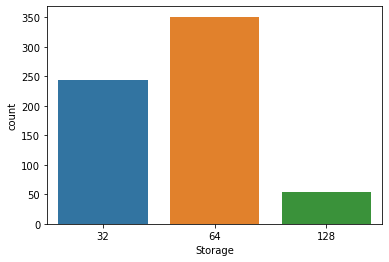

In [22]:
sns.countplot(sp['Storage'])

## Observations:
* We observe that Storage with 64 GB are higher in number followed by 32,128 GB.
* We also Observe that Storage with 128 GB are less number of mobiles

### Ratings

<AxesSubplot:xlabel='Ratings', ylabel='count'>

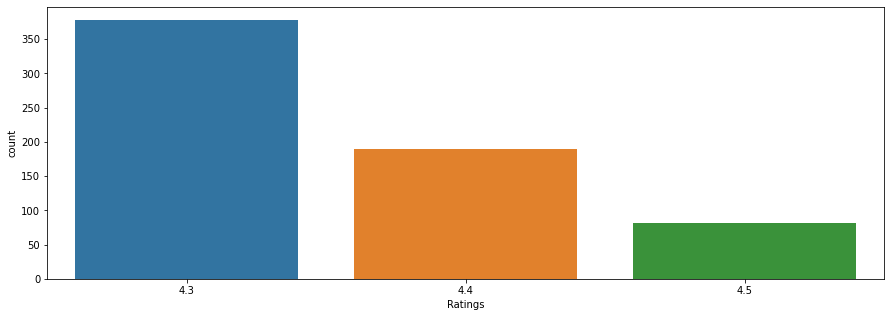

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(sp['Ratings'])

## Observations:
* it shows most no. of product having 4.3 ratings.
* it shows less no. of product having 4.5 ratings.

### Battery

<AxesSubplot:xlabel='battery'>

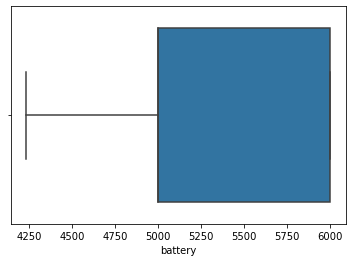

In [24]:
sns.boxplot(sp['battery'])

<AxesSubplot:xlabel='Brand', ylabel='battery'>

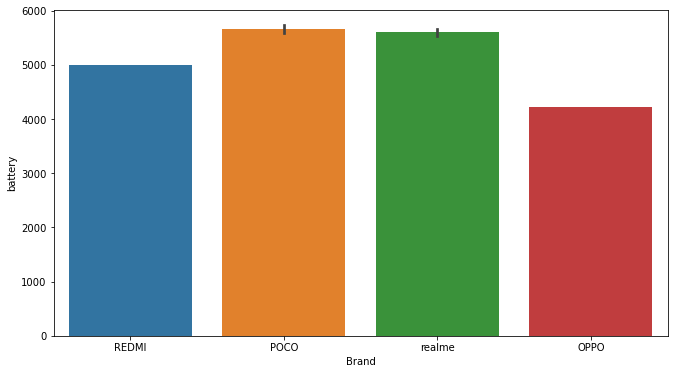

In [30]:
plt.figure(figsize=(11,6))
sns.barplot(x='Brand',y='battery',data=sp)

### Screen Size

<AxesSubplot:xlabel='Brand', ylabel='Screen Size'>

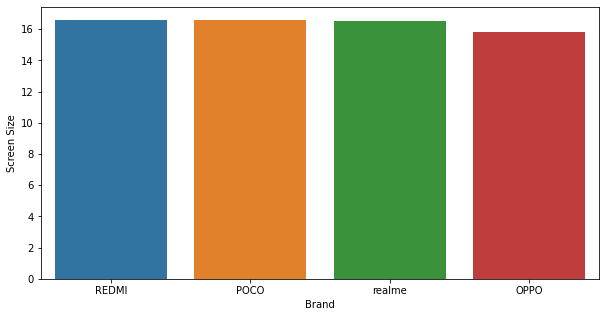

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='Brand',y='Screen Size',data=sp)

<AxesSubplot:xlabel='Screen Size'>

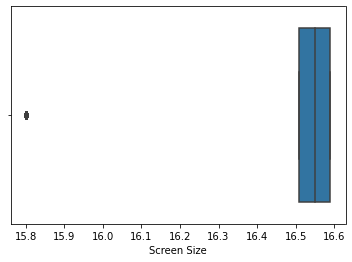

In [25]:
sns.boxplot(sp['Screen Size'])

## Observations:
* we observe that mean and median is same.
* The data is skewed towards right side.
* their is only one out layer.

### OrignalPrice

<AxesSubplot:xlabel='Brand', ylabel='OrignalPrice'>

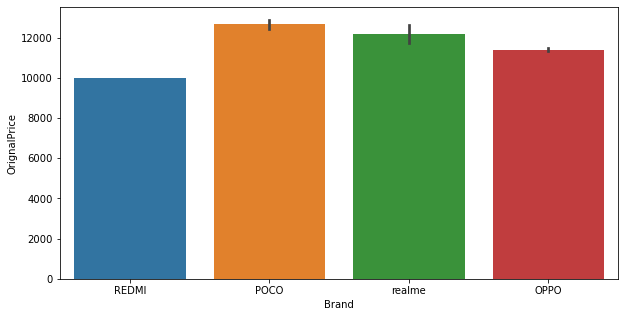

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='Brand',y='OrignalPrice',data=sp)

<AxesSubplot:xlabel='OrignalPrice'>

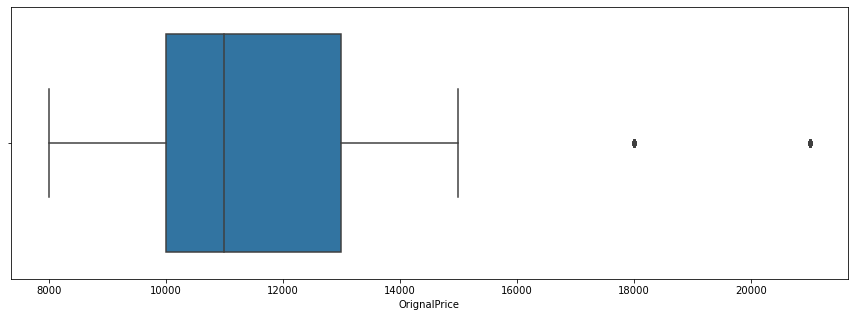

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(sp['OrignalPrice'])

## Observations
* We observe that the max MRP of the mobile exists till 22000.
* The mean is very much higher than median
* The data is skewed towards right side.
* There were two outliers present for the column OrignalPrice.

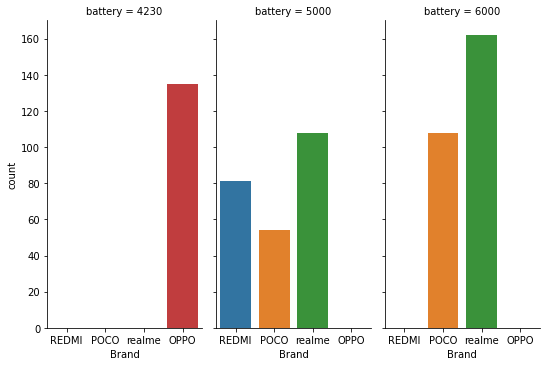

In [46]:
sns.catplot(x="Brand",  col="battery", data = sp, kind='count',height=5, aspect=.5);

## OfferPrice

<AxesSubplot:xlabel='OfferPrice'>

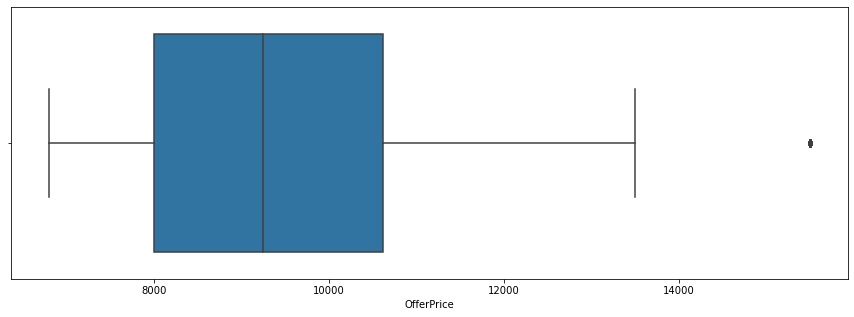

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(sp['OfferPrice'])

## Observations
* We observe that the max offer-price of the mobile exists till 16000.
* The mean is much higher than median
* The data is skewed towards right side.
* There were only one outliers present for the column Offerprice.
* It is understood that offer-price is dependent on OrignalPrice .

In [28]:
sp.groupby(by='Brand').describe()

S.NO                                                              \
        count        mean         std   min     25%    50%     75%    max   
Brand                                                                       
OPPO    135.0  327.800000  187.637305  13.0  161.50  328.0  494.00  642.0   
POCO    162.0  320.000000  187.544082   2.0  155.25  320.5  485.00  636.0   
REDMI    81.0  313.333333  188.102033   0.0  147.00  313.0  480.00  627.0   
realme  270.0  326.500000  187.412745   4.0  165.25  328.5  487.25  647.0   

       OfferPrice                ... FrontCamera       battery               \
            count          mean  ...         75%   max   count         mean   
Brand                            ...                                          
OPPO        135.0   8790.000000  ...         5.0   5.0   135.0  4230.000000   
POCO        162.0  10332.333333  ...         8.0   8.0   162.0  5666.666667   
REDMI        81.0   7999.000000  ...         5.0   5.0    81.0  5000.000000   
realme      270.0   9809.000000  ...         8.0  16.0   270.0  5600.000000   

                                                            
               std     min     25%     50%     75%     max  
Brand                                                       
OPPO      0.000000  4230.0  4230.0  4230.0  4230.0  4230.0  
POCO    472.866244  5000.0  5000.0  6000.0  6000.0  6000.0  
REDMI     0.000000  5000.0  5000.0  5000.0  5000.0  5000.0  
realme  490.807695  5000.0  5000.0  6000.0  6000.0  6000.0  

[4 rows x 104 columns]

# Bivariate-Analysis

In [29]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                648 non-null    int64  
 1   Product Name        648 non-null    object 
 2   OfferPrice          648 non-null    int64  
 3   OrignalPrice        648 non-null    int64  
 4   Discount            648 non-null    int64  
 5   Ratings             648 non-null    float64
 6   Brand               648 non-null    object 
 7   Color               648 non-null    object 
 8   RamSize             648 non-null    int64  
 9   Storage             648 non-null    int64  
 10  Expandable Storage  648 non-null    int64  
 11  Screen Size         648 non-null    float64
 12  Display             648 non-null    int64  
 13  RearCamera          648 non-null    int64  
 14  FrontCamera         648 non-null    int64  
 15  battery             648 non-null    int64  
 16  Processo

<AxesSubplot:xlabel='Product Name', ylabel='OrignalPrice'>

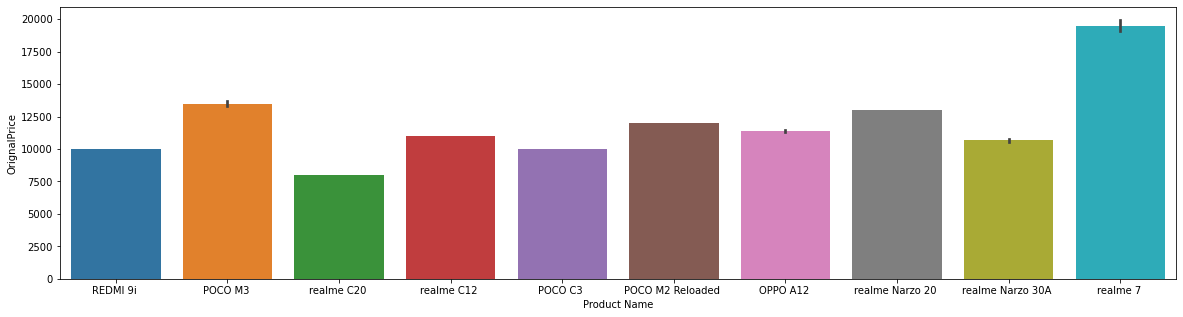

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(x='Product Name',y='OrignalPrice',data=sp)

In [31]:
sp.groupby(["Brand"]).describe()["Ratings"].T

Brand,OPPO,POCO,REDMI,realme
count,135.000000,162.000000,8.100000e+01,270.00000
mean,4.340000,4.333333,4.300000e+00,4.39000
std,0.049172,0.074767,6.255986e-15,0.07013
min,4.300000,4.300000,4.300000e+00,4.30000
25%,4.300000,4.300000,4.300000e+00,4.30000
50%,4.300000,4.300000,4.300000e+00,4.40000
75%,4.400000,4.300000,4.300000e+00,4.40000
max,4.400000,4.500000,4.300000e+00,4.50000


In [32]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                648 non-null    int64  
 1   Product Name        648 non-null    object 
 2   OfferPrice          648 non-null    int64  
 3   OrignalPrice        648 non-null    int64  
 4   Discount            648 non-null    int64  
 5   Ratings             648 non-null    float64
 6   Brand               648 non-null    object 
 7   Color               648 non-null    object 
 8   RamSize             648 non-null    int64  
 9   Storage             648 non-null    int64  
 10  Expandable Storage  648 non-null    int64  
 11  Screen Size         648 non-null    float64
 12  Display             648 non-null    int64  
 13  RearCamera          648 non-null    int64  
 14  FrontCamera         648 non-null    int64  
 15  battery             648 non-null    int64  
 16  Processo

<AxesSubplot:xlabel='Brand', ylabel='OrignalPrice'>

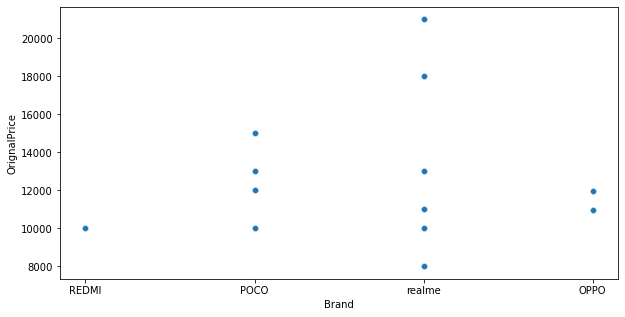

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Brand',y='OrignalPrice',data=sp)

<AxesSubplot:xlabel='Brand', ylabel='OfferPrice'>

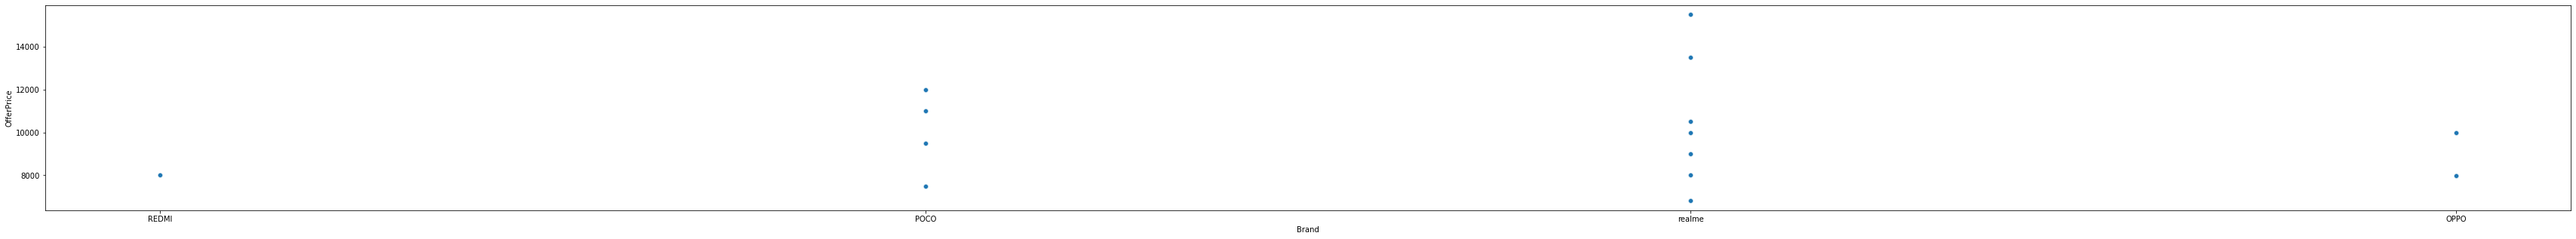

In [36]:
plt.figure(figsize=(60,5))
sns.scatterplot(x="Brand", y="OfferPrice", data=sp)

<AxesSubplot:xlabel='Brand', ylabel='Storage'>

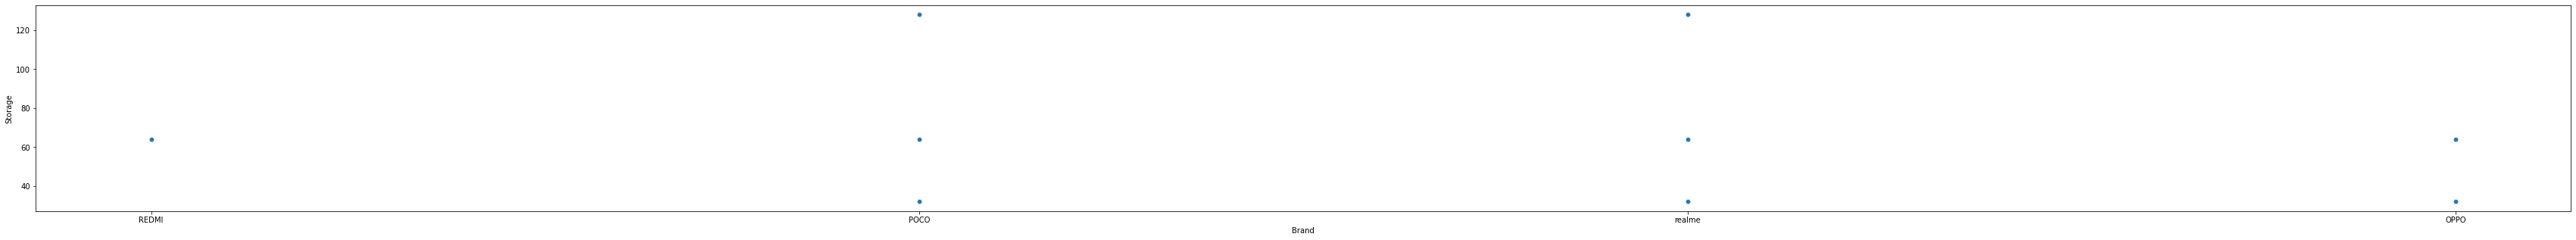

In [37]:
plt.figure(figsize=(60,5))
sns.scatterplot(x="Brand", y="Storage", data=sp)

<AxesSubplot:xlabel='Product Name', ylabel='Storage'>

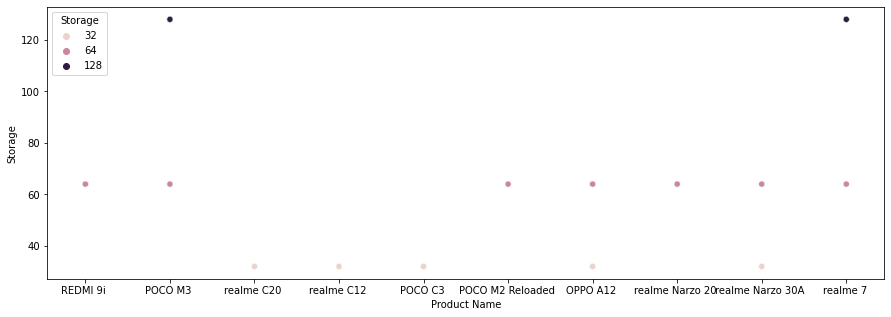

In [35]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Product Name", y="Storage", hue='Storage',data=sp)

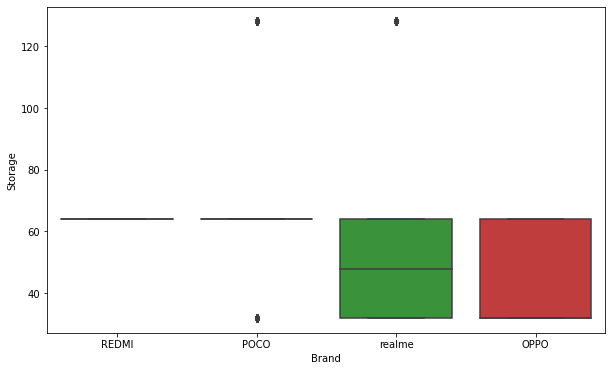

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Brand", y="Storage", data =sp);

<AxesSubplot:xlabel='Brand'>

<Figure size 450x300 with 0 Axes>

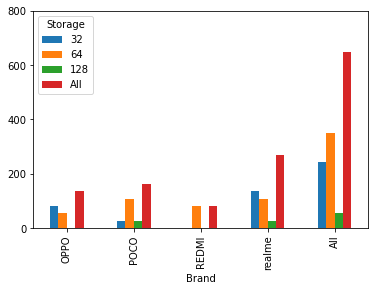

In [49]:
plt.figure(dpi = 75)
pd.crosstab(sp["Brand"],sp["Storage"], margins=True).plot(kind="bar", yticks=np.arange(0,1000,200))

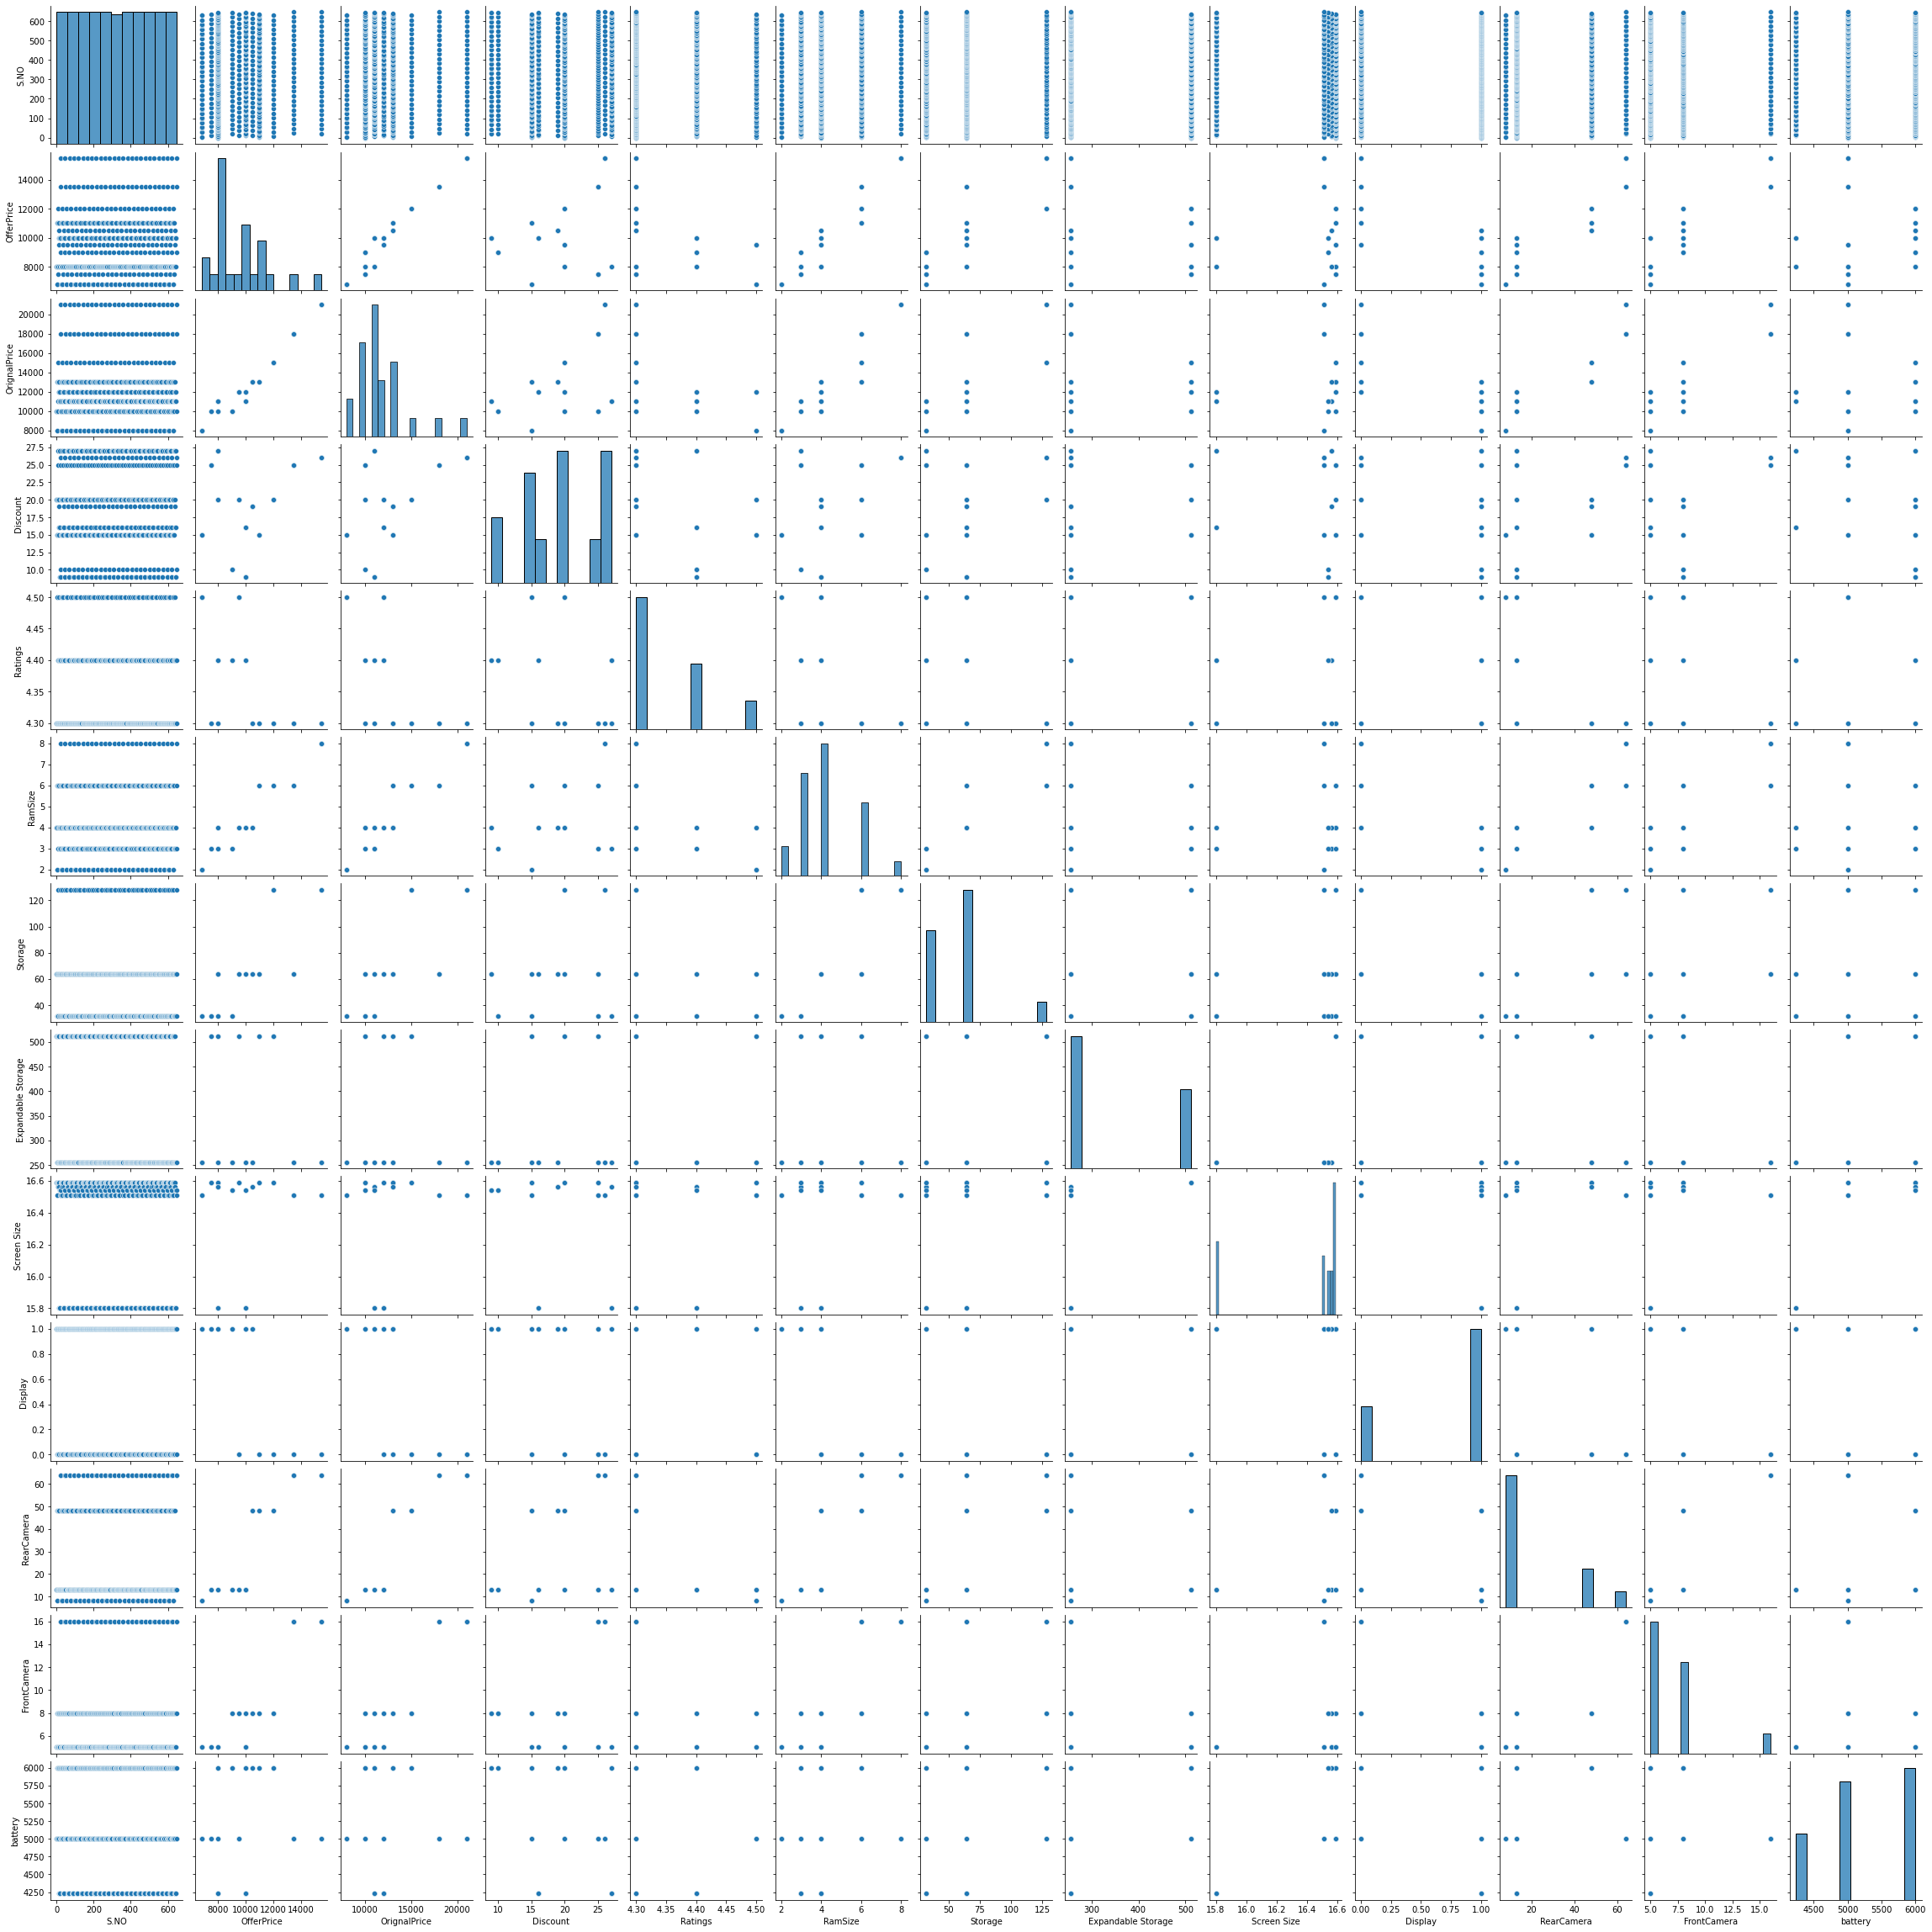

In [40]:
sns.pairplot(sp)

In [41]:
sp.corr()

,S.NO,OfferPrice,OrignalPrice,Discount,Ratings,RamSize,Storage,Expandable Storage,Screen Size,Display,RearCamera,FrontCamera,battery
S.NO,1.000000,0.016953,0.016866,0.000095,0.000158,0.005751,0.002322,-0.023695,-0.013498,-0.001225,0.006897,0.019549,-0.004706
OfferPrice,0.016953,1.000000,0.951152,-0.044778,-0.350316,0.921364,0.796659,0.019830,0.159991,-0.748303,0.873559,0.889557,0.238841
OrignalPrice,0.016866,0.951152,1.000000,0.261557,-0.428822,0.873906,0.736138,-0.026341,0.072030,-0.715635,0.860636,0.878687,0.088988
Discount,0.000095,-0.044778,0.261557,1.000000,-0.382103,-0.020226,-0.097156,-0.064355,-0.274572,-0.005875,0.082901,0.017815,-0.415231
Ratings,0.000158,-0.350316,-0.428822,-0.382103,1.000000,-0.513114,-0.310668,-0.350543,0.063359,0.232677,-0.519218,-0.223523,0.011033
RamSize,0.005751,0.921364,0.873906,-0.020226,-0.513114,1.000000,0.831181,0.348148,0.266736,-0.828417,0.877762,0.761237,0.272423
Storage,0.002322,0.796659,0.736138,-0.097156,-0.310668,0.831181,1.000000,0.303447,0.253777,-0.613618,0.648765,0.590255,0.192212
Expandable Storage,-0.023695,0.019830,-0.026341,-0.064355,-0.350543,0.348148,0.303447,1.000000,0.469303,-0.449712,0.183370,-0.095302,0.211618
Screen Size,-0.013498,0.159991,0.072030,-0.274572,0.063359,0.266736,0.253777,0.469303,1.000000,-0.341490,0.299775,0.304469,0.771719
Display,-0.001225,-0.748303,-0.715635,-0.005875,0.232677,-0.828417,-0.613618,-0.449712,-0.341490,1.000000,-0.803889,-0.682976,-0.293598


<Figure size 7200x4800 with 0 Axes>

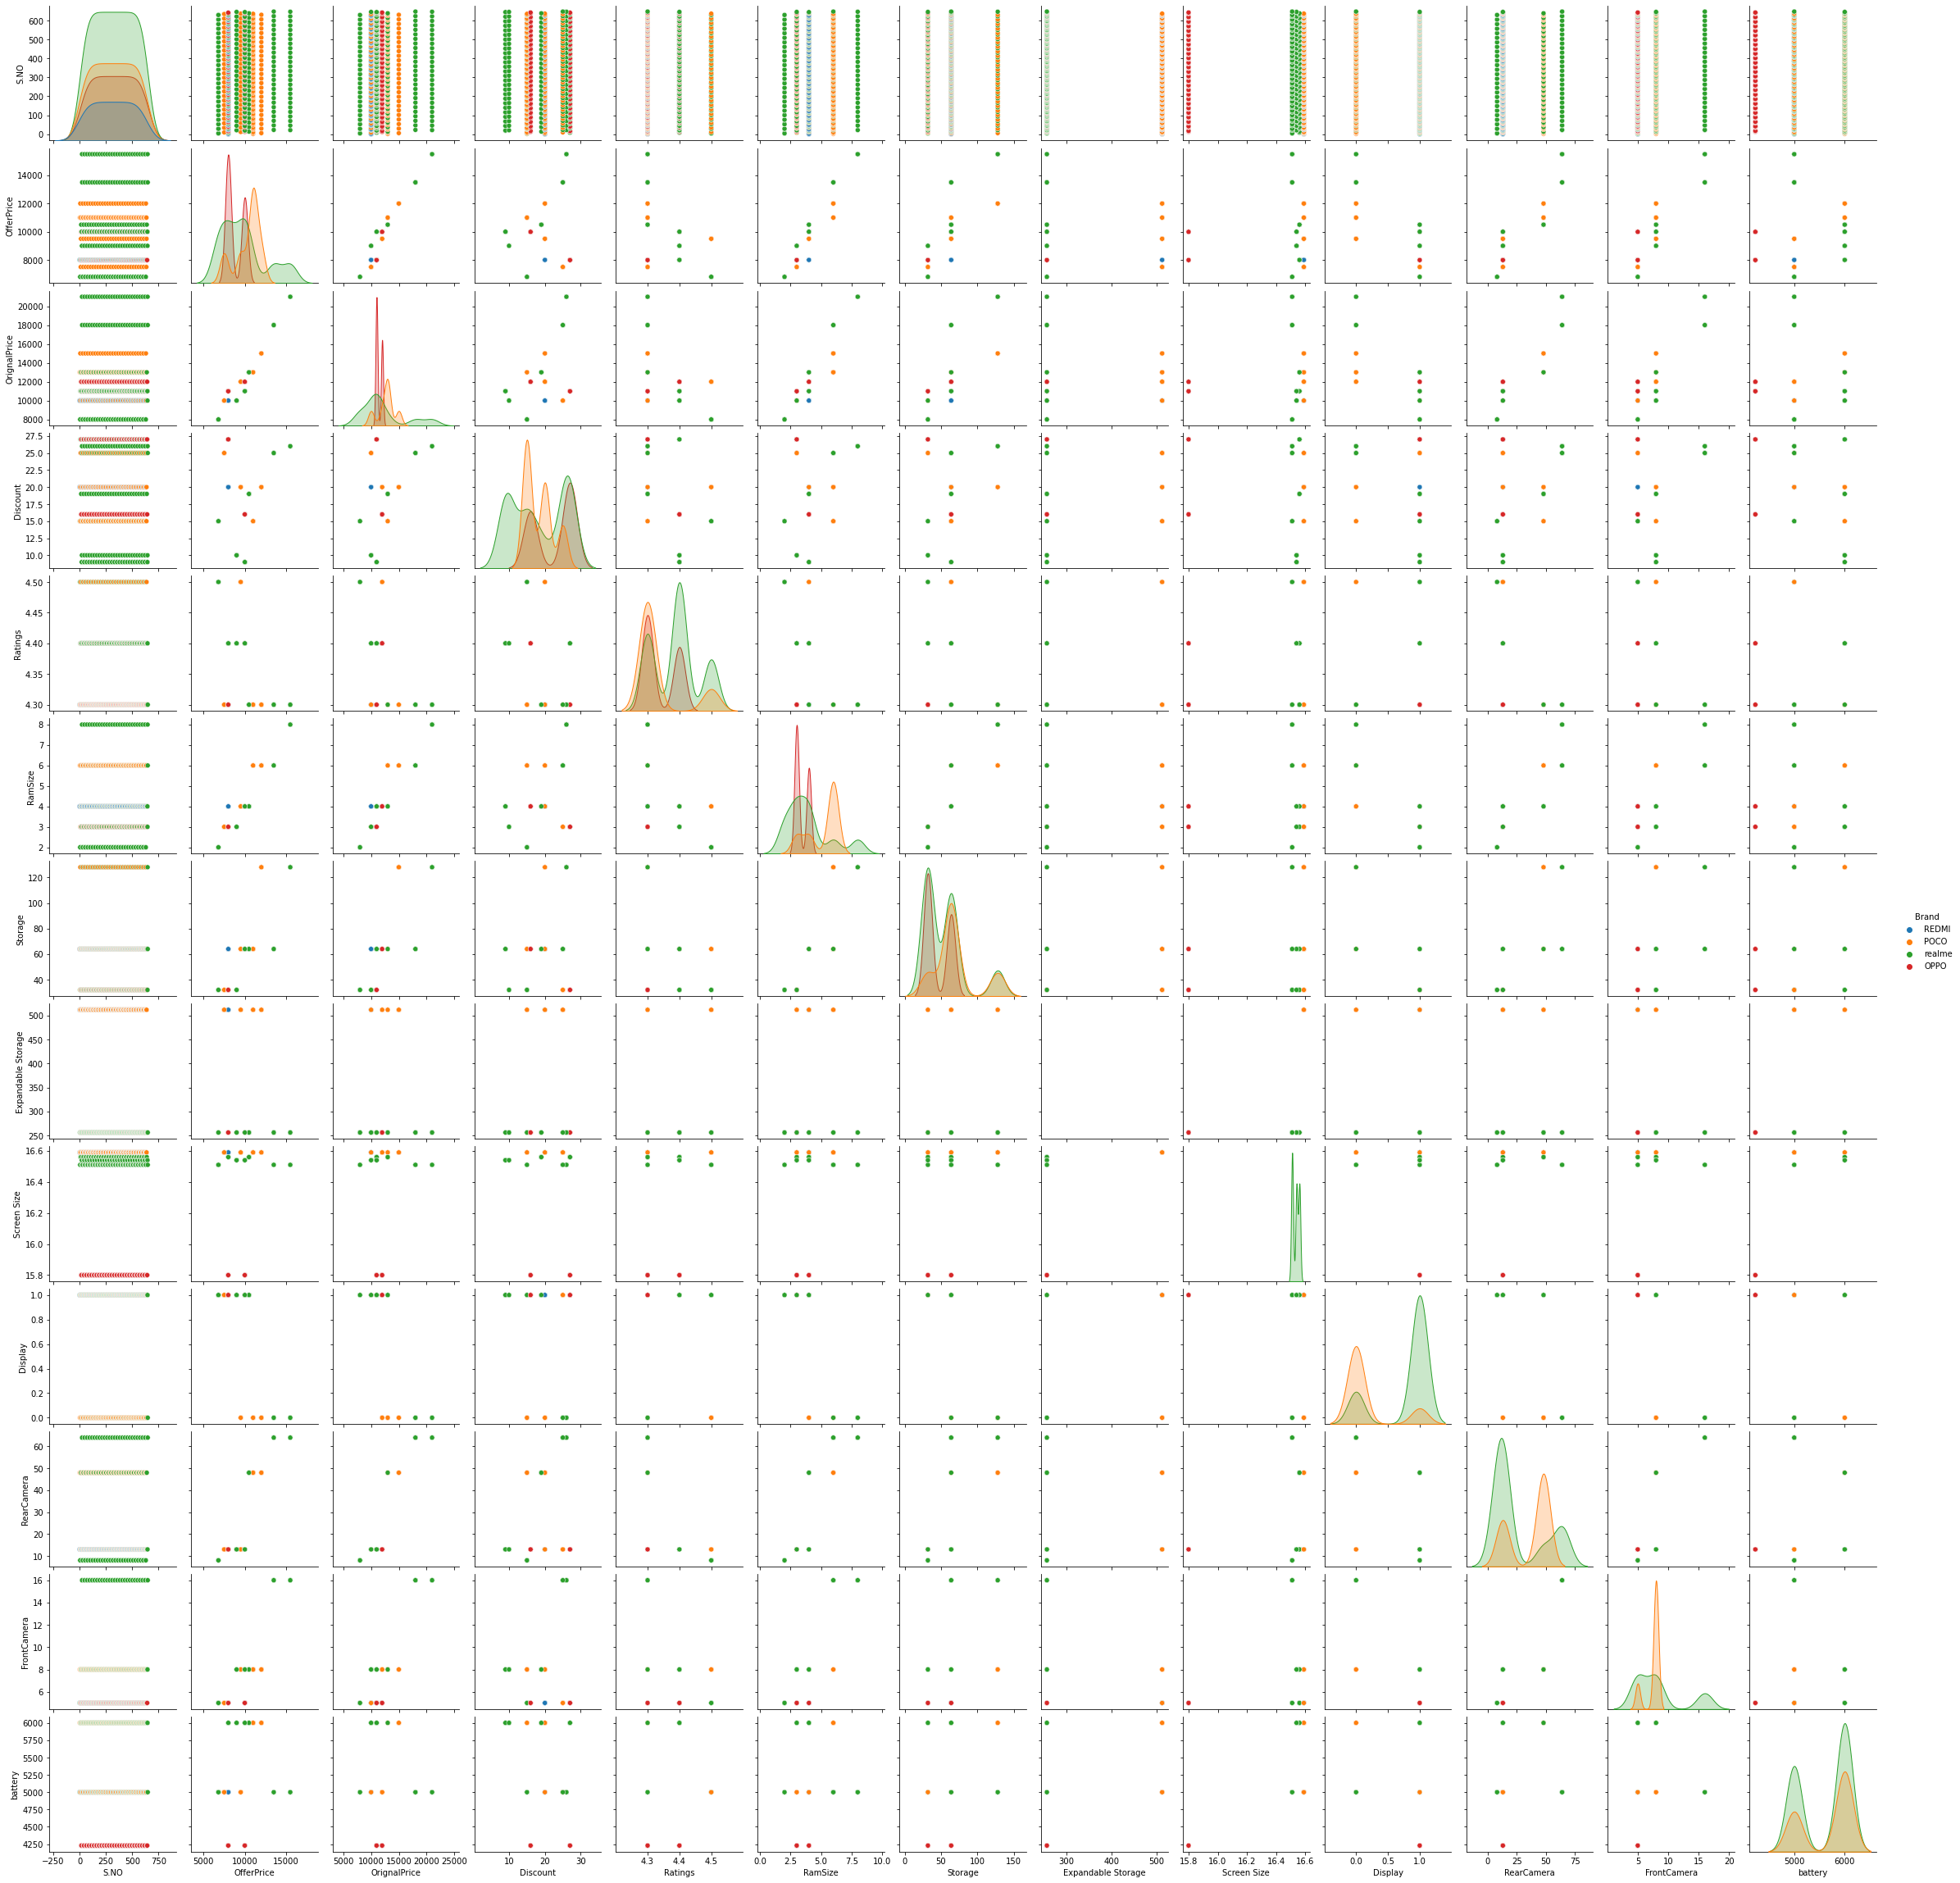

In [44]:
plt.figure(dpi = 1200)
sns.pairplot(sp, hue = 'Brand')

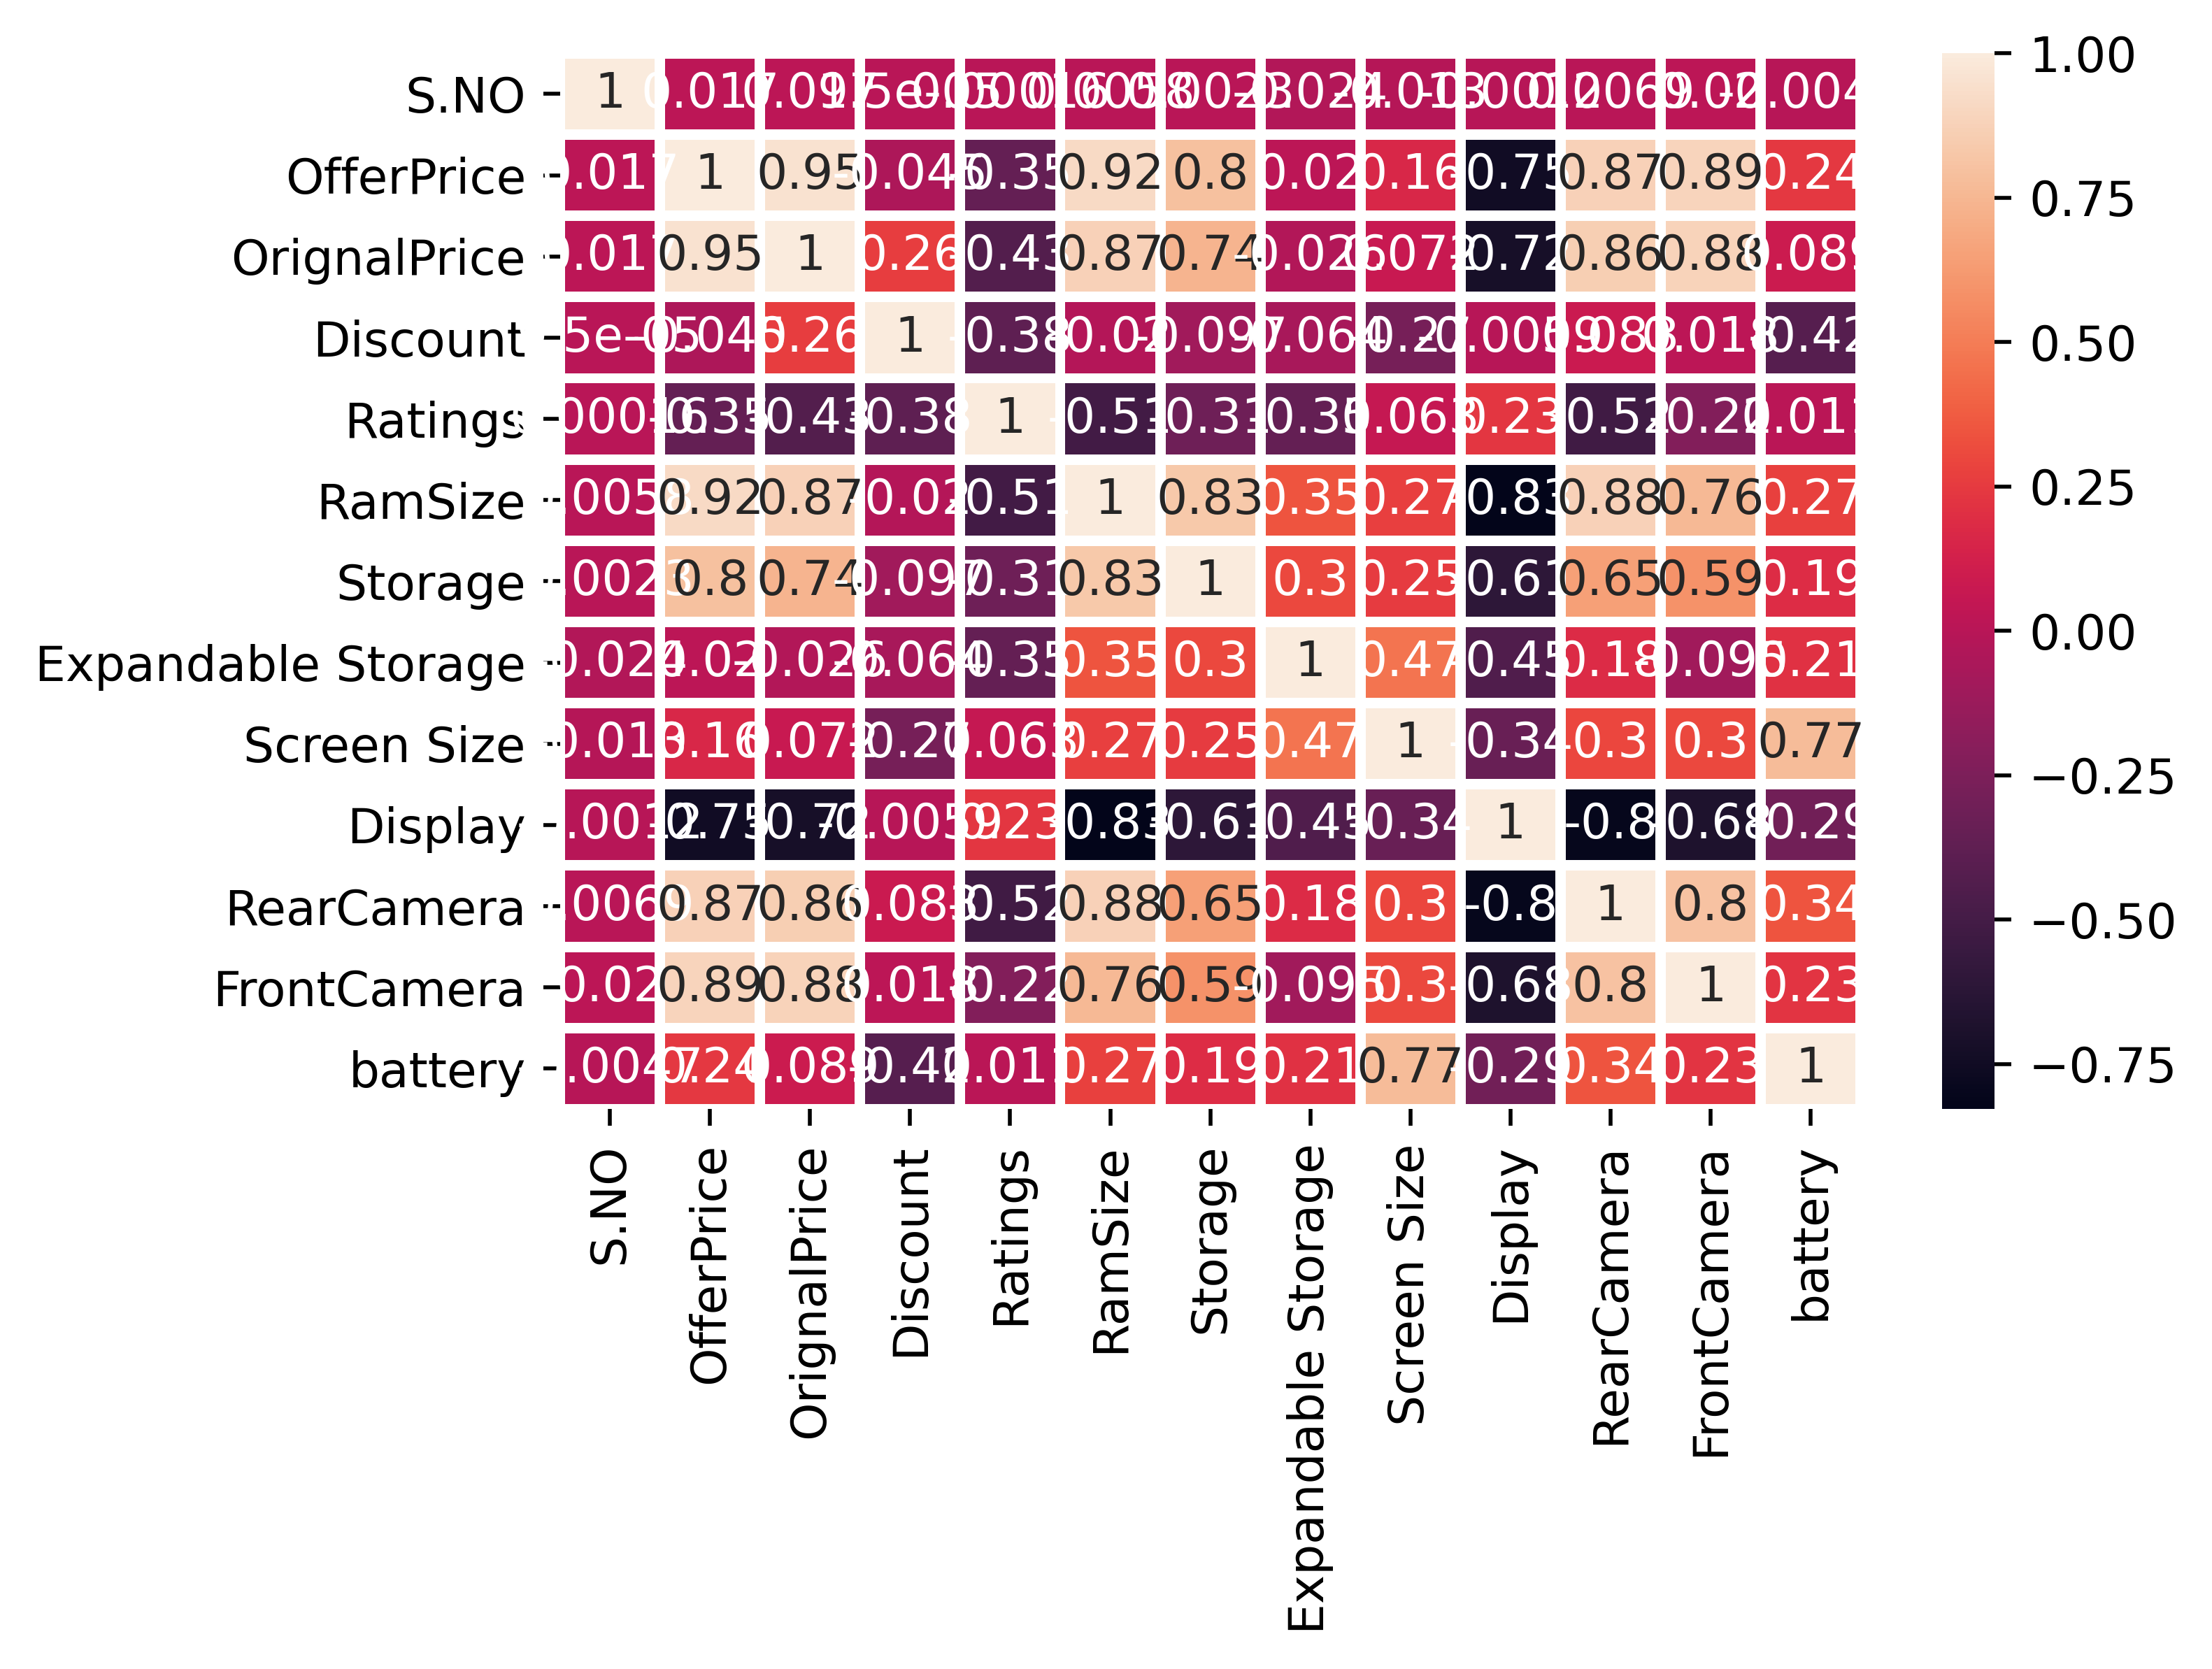

In [45]:
plt.figure(dpi =500)
sns.heatmap(sp.corr(),linecolor='white',linewidths=2,annot=True);

<AxesSubplot:xlabel='Brand'>

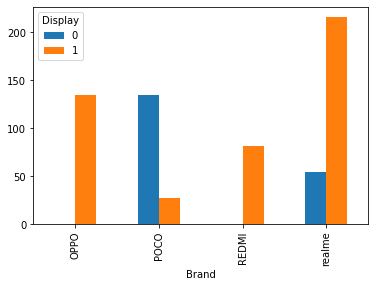

In [46]:
pd.crosstab(sp["Brand"],sp["Display"]).plot(kind="bar")

<AxesSubplot:xlabel='Brand'>

<Figure size 450x300 with 0 Axes>

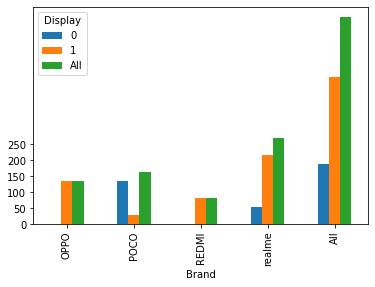

In [48]:
plt.figure(dpi = 75)
pd.crosstab(sp["Brand"],sp["Display"], margins=True).plot(kind="bar", yticks=np.arange(0,260,50))

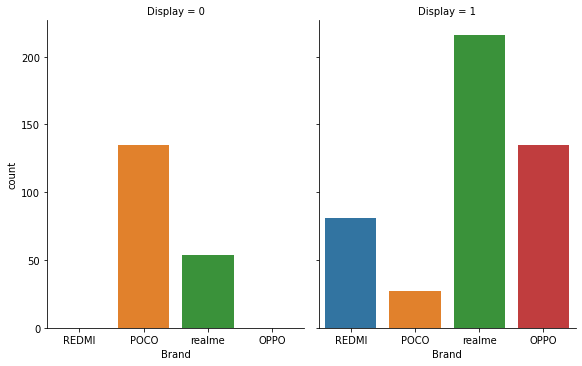

In [49]:
sns.catplot(x="Brand",  col="Display", data = sp, kind='count',height=5, aspect=.8);

# Conclusion

* It is found that the best specification and better memory is offering by POCO & RealMe.
* But the cost of RealMe products are up to 23,000 Thous.
* Which is affordable for all in now a days.
* The next smartphone Brand OPPO is offering better specifications but the prices are compitative 
  to  RealMe products.
* OPPO mobile top spec phones are also not Affordable to all.
* The other brand like Redmi are also offering mobiles at top specs missing some features like    
  battery capacity and memory at mid range prices.
* So these were also considered to purchase alternatives to POCO and RealMe.
* The Brand Realme which is found offering 8 GB RAM and 128 GB ROM.
* Which is priced at 23000 which has become competitive to  top spec mobiles of other brands   
  which are priced at double to this product.
* The products from Realme are offering Class specifications at lowest prices.
* Hence we conclude Realme is the Brand offering Better product for Better value.
